In [40]:
!pip install opensmile

In [41]:
import opensmile


In [42]:
import pandas as pd


In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
audio_path = '/content/drive/MyDrive/CIHR/French-data/haiti1.mp3'

In [45]:
google_drive_folder = "/content/drive/My Drive/CIHR/French-data/features"


In [46]:
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.LowLevelDescriptors,
)

In [47]:
features = smile.process_file(audio_path)


In [48]:
features_df = pd.DataFrame(features)

# Save features as CSV in Google Drive
csv_filename = "extracted_features.csv"
features_csv_path = google_drive_folder + csv_filename
features_df.to_csv(features_csv_path, index=False)

# Provide a download link to the user
#files.download(features_csv_path)

In [ ]:
print(features_df)

In [36]:
features_df.shape


(5079, 25)

In [37]:
feature_names = features_df.columns.tolist()

# Print the names of the features
print("Feature names:", feature_names)

Feature names: ['Loudness_sma3', 'alphaRatio_sma3', 'hammarbergIndex_sma3', 'slope0-500_sma3', 'slope500-1500_sma3', 'spectralFlux_sma3', 'mfcc1_sma3', 'mfcc2_sma3', 'mfcc3_sma3', 'mfcc4_sma3', 'F0semitoneFrom27.5Hz_sma3nz', 'jitterLocal_sma3nz', 'shimmerLocaldB_sma3nz', 'HNRdBACF_sma3nz', 'logRelF0-H1-H2_sma3nz', 'logRelF0-H1-A3_sma3nz', 'F1frequency_sma3nz', 'F1bandwidth_sma3nz', 'F1amplitudeLogRelF0_sma3nz', 'F2frequency_sma3nz', 'F2bandwidth_sma3nz', 'F2amplitudeLogRelF0_sma3nz', 'F3frequency_sma3nz', 'F3bandwidth_sma3nz', 'F3amplitudeLogRelF0_sma3nz']


In [34]:
num_features = features_df.shape[1]
print("Number of features:", num_features)

Number of features: 25


In [57]:
average_features = features_df.mean()
print(average_features)

Loudness_sma3                     1.270479
alphaRatio_sma3                 -11.083415
hammarbergIndex_sma3             19.109575
slope0-500_sma3                  -0.009504
slope500-1500_sma3               -0.013443
spectralFlux_sma3                 1.059790
mfcc1_sma3                       17.635002
mfcc2_sma3                        8.146254
mfcc3_sma3                       17.951620
mfcc4_sma3                       -0.199241
F0semitoneFrom27.5Hz_sma3nz      15.709788
jitterLocal_sma3nz                0.022065
shimmerLocaldB_sma3nz             0.720966
HNRdBACF_sma3nz                   2.171591
logRelF0-H1-H2_sma3nz             5.177893
logRelF0-H1-A3_sma3nz            13.991380
F1frequency_sma3nz              543.262817
F1bandwidth_sma3nz             1104.453613
F1amplitudeLogRelF0_sma3nz      -83.669189
F2frequency_sma3nz             1548.645264
F2bandwidth_sma3nz              789.495239
F2amplitudeLogRelF0_sma3nz      -92.254135
F3frequency_sma3nz             2564.042236
F3bandwidth

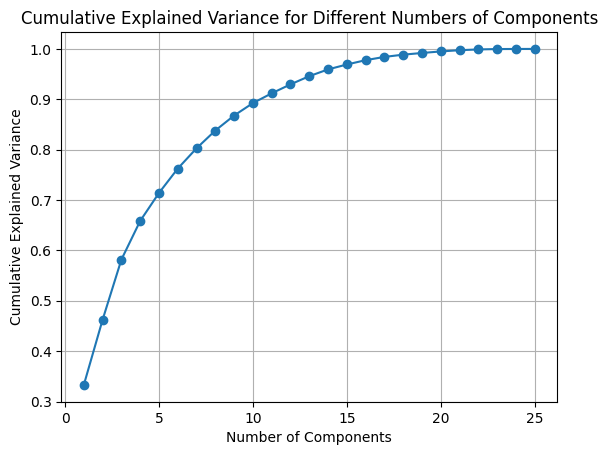

Optimal Number of Components: 14


In [60]:
# Install required packages (if not already installed)
!pip install pandas scikit-learn matplotlib

import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load your data into a DataFrame (replace this with your data)
# data_df = pd.read_csv('your_data.csv')

# Separate features and target variable (if applicable)
# X = data_df.drop('target', axis=1)
X = features_df

# Perform standardization (optional but recommended for PCA)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Initialize PCA
pca = PCA()

# Apply PCA to the scaled features
pca.fit(scaled_features)

# Calculate cumulative explained variance
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

# Plot the cumulative explained variance curve
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance for Different Numbers of Components')
plt.grid()
plt.show()

# Set a threshold (e.g., 95% or 99%)
threshold = 0.95  # Adjust as needed

# Find the optimal number of components that meets the threshold
optimal_components = next(i for i, val in enumerate(cumulative_explained_variance) if val >= threshold) + 1

print(f'Optimal Number of Components: {optimal_components}')


In [61]:
import numpy as np
from sklearn.decomposition import PCA

# Assuming X is your data frame of features, where each row is a sample and each column is a feature
# Make sure to normalize or standardize your features before applying PCA if necessary

# Number of optimal principal components
n_components = optimal_components

# Initialize PCA with the desired number of components
pca = PCA(n_components=n_components)

# Fit PCA to your data
pca.fit(X)

# Transform your data using the computed principal components
X_pca = pca.transform(X)

# X_pca now contains the transformed data with the specified number of principal components
